In [1]:
import cv2 
import os
import numpy as np
import matplotlib.pyplot as plt

image_file_path = '/Users/devin/Desktop/wondersign/Data_Wrangling/TheRoomPlace/images/'

def generatePalette(RGB, ranges = 5):
    h = 100
    w = 100
    distance = int(255/ranges)
    temp = np.zeros((h,w,3), np.uint8)
    temp[:, :, 0] = int(RGB[0]/distance)*distance
    temp[:, :, 1] = int(RGB[1]/distance)*distance
    temp[:, :, 2] = int(RGB[2]/distance)*distance
    return temp

def hashColor(RGB, ranges = 5):
    if RGB[0] == 255 and RGB[1] == 255 and RGB[2] == 255:
        return '255-255-255'
    distance = int(255/ranges)
    R = int(RGB[0]/distance)*distance
    G = int(RGB[1]/distance)*distance
    B = int(RGB[2]/distance)*distance
    return '-'.join([str(R), str(G), str(B)])

def getRGB(hashKey):
    RGB = hashKey.split('-')
    RGB = tuple(int(a) for a in RGB)
    return RGB

def getTopColor(image, numbers = 2, threshold = 0.2, palette_size = (100, 100)):
    area = palette_size[0] * palette_size[1]
    least_pixels =  area * threshold
    dic = {}
    shape = image.shape
    for i in range(shape[0]):
        for j in range(shape[1]):
            key = hashColor(image[i, j])
            if key:
                if key in dic:
                    dic[key] += 1
                else:
                    dic[key] = 1
    
    white_key = '255-255-255'
    ####### This Part May Need a Different Approach ######
    # Using white space to determine if it is a scene is unreliable
    if white_key in dic:
        print('White pixels = ' + str(dic[white_key]))
        # remove whitespace count from area count. then area is the total pixels of product pixels
        area = area - dic[white_key]
        print('Product pixels = ' + str(area))
        least_pixels =  area * 0.2
        if dic[white_key] < least_pixels:
#             print(dic[white_key] )
            return
        del dic[white_key]
    else:
        return
    #######################################################
    
    keys = sorted(dic, key=lambda k: dic[k], reverse=True)
    colors = []
    for k in keys[0:numbers]:
        percent = round(dic[k]/area*100, 2)
        print(k + ' palette pixels = ' + str(dic[k]) + ' | Color percentage = ' + str(percent) + '%')
        if dic[k] > least_pixels:
            colors.append(k)
            
    colors = [getRGB(c) for c in colors]
    return colors



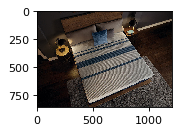

White pixels = 5431
Product pixels = 4569
204-204-204 palette pixels = 3647 | Color percentage = 79.82%
204-204-255 palette pixels = 333 | Color percentage = 7.29%
51-51-51 palette pixels = 198 | Color percentage = 4.33%


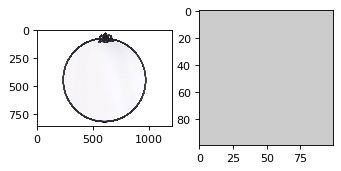

White pixels = 4755
Product pixels = 5245
153-153-153 palette pixels = 3267 | Color percentage = 62.29%
153-153-102 palette pixels = 770 | Color percentage = 14.68%
204-204-204 palette pixels = 398 | Color percentage = 7.59%


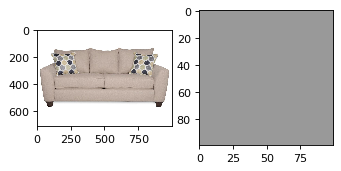

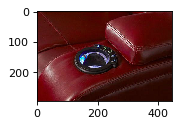

White pixels = 5518
Product pixels = 4482
204-204-153 palette pixels = 1838 | Color percentage = 41.01%
204-204-204 palette pixels = 1416 | Color percentage = 31.59%
204-153-153 palette pixels = 487 | Color percentage = 10.87%


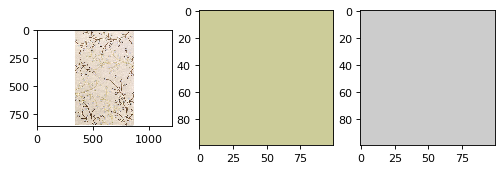

In [2]:
import numpy as np
import cv2

# def isnotScene(image, marginPercent):
#     shape = image.shape
#     w = shape[0]
#     h = shape[1]
#     wg = int(w*marginPercent)
#     hg = int(h*marginPercent)
    
#     m = image[0:wg]
#     for i in range(m.shape[0]):
#         for j in range(m.shape[1]):
#             for k in range(m.shape[2]):
#                 if m[i][j][k] != 255:
#                     return False
#     return True

    

def loadImage(img_path):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def resize(img, size = (100, 100)):
    img = cv2.resize(img, size, interpolation = cv2.INTER_AREA)
    return img

from random import shuffle
def test(nums = 2, samples = 100):
    files = os.listdir(image_file_path)
    shuffle(files)
    files = files[0:samples]
    for f in files:
        img = loadImage(image_file_path+f)
        resized_img = resize(img)
#         if isnotScene(resized_img, 0.01):
        f= plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')
        f.add_subplot(1,1+nums, 1)
        plt.imshow(img)


        colors = getTopColor(resized_img, numbers = nums)
        if colors:
            for i, c in enumerate(colors):
                f.add_subplot(1,1+nums, i+2)
                plt.imshow(generatePalette(c))

        plt.show()
        
       
test(nums = 3, samples = 5)